## Download dataset

In [1]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 10.9MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('./advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Task 1: Finishing load_data_from_file() function

In [3]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

def load_data_from_file(fileName = 'advertising.csv'):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.c_[np.ones(len(features_X)), features_X]

  return features_X, sales_Y

In [4]:
features_X, _ = load_data_from_file()
print(features_X[:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [5]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


## Task 2: initializing value for each gene in chromosome (individual)

In [6]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

In [7]:
def create_individual(n=4, bound=10):
  individual = []
  for _ in range(n):
    individual.append(generate_random_value(bound))
  return individual

individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


## Task 3: Bulding fitness function to evaluate fitness score for each chromosome

In [8]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
  theta = np.array(individual).reshape(-1)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()

  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 1 / (1 + loss)

  return fitness_value

In [9]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


## Task 4: Crossover between 2 chromosomes

In [10]:
def crossover(individual1, individual2, crossover_rate=0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()

  if random.random() < crossover_rate:
      point = random.randint(1, len(individual1) - 1)
      individual1_new = individual1[:point] + individual2[point:]
      individual2_new = individual2[:point] + individual1[point:]
  else:
      individual1_new, individual2_new = individual1, individual2
  return individual1_new, individual2_new

In [11]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print(f"Individual 1: ", individual1)
print(f"Individual 2: ", individual2)

Individual 1:  [4.09, 4.82, -0.79, -2.41]
Individual 2:  [3.44, 2.57, 3.1, 4.02]


## Task 5: Mutation on chromosome

In [12]:
def mutate(indivitual, mutation_rate=0.05):
  individual_m = individual.copy()
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_m[i] += generate_random_value()

  return individual_m

In [13]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


In [14]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [15]:
population = initializePopulation(100)
print(len(population))

100


In [16]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [17]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-0.6180140340724194, 4.171481192782721, -0.8787980691423014, -0.06418023552658636]


In [18]:
def create_new_population(old_population, elitism=2, gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)

  if gen%1 == 0:
    print(f'Best loss: {compute_loss(sorted_population[m-1])}, with chromosome: {sorted_population[m-1]}')

    new_population = []
  while len(new_population) < m - elitism:
      # Selection
      individual1 = selection(sorted_population, m)
      individual2 = selection(sorted_population, m)

      # Crossover
      individual1, individual2 = crossover(individual1, individual2)

      # Mutation
      individual1 = mutate(individual1)
      individual2 = mutate(individual2)

      new_population.append(individual1)
      new_population.append(individual2)

  # copy elitism chromosomes that have best fitness score to the next generation:
  for ind in sorted_population[m - elitism:]:
      new_population.append(ind)

  return new_population, compute_loss(sorted_population[m-1])

In [19]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805, with chromosome: [3.44, 2.57, -0.79, -2.41]


In [22]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)

  return losses_list

In [23]:
losses_list = run_GA()

Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1.7298568974307782, -0.6230891111498904]
Best loss: 960.9082730533232, with chromosome: [3.6372786412906652, 0.07383449275513265, 1

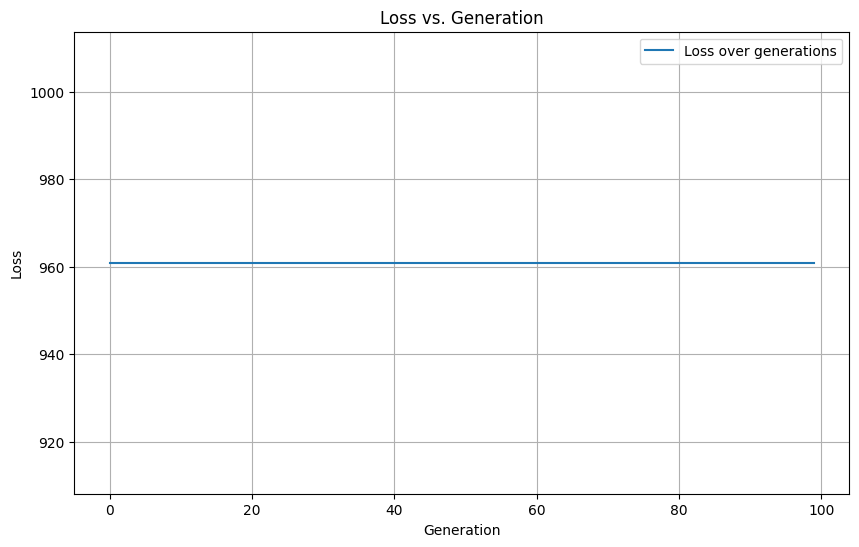

In [24]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.figure(figsize=(10, 6))
  plt.plot(losses_list, label='Loss over generations')
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.title('Loss vs. Generation')
  plt.legend()
  plt.grid(True)
  plt.show()

visualize_loss(losses_list)

[2.7746435583966687, 0.14035467838271698, -0.37922557173930005, 1.343562920465169]


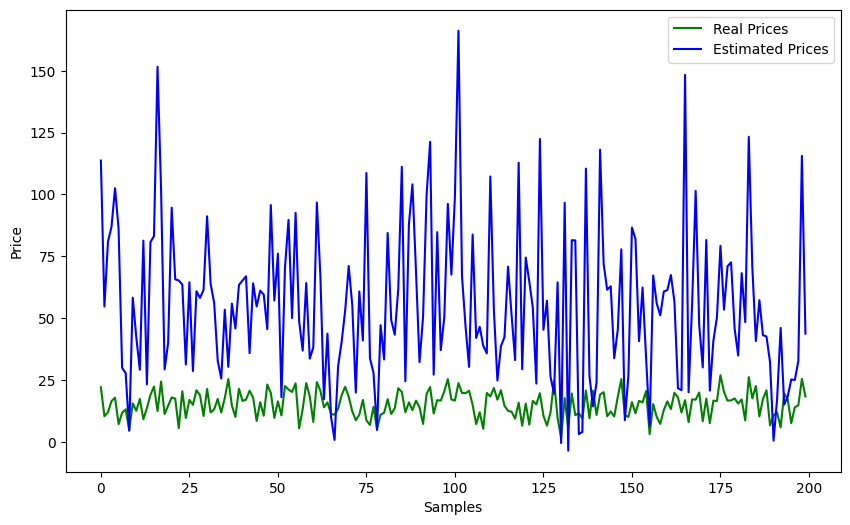

In [25]:
def visualize_predict_gt():

  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_prices.append(feature.dot(theta))

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()